In [1]:
%matplotlib inline

In [2]:
import seaborn as sns
import pandas as pd

# Series

Pandas has two core data structures used to store data: The Series and the DataFrame.

The series is a one-dimensional array-like structure designed to hold a single array (or ‘column’) of data and an associated array of data labels, called an index. We can create a series to experiment with by simply passing a list of data, let’s use numbers in this example:

In [3]:
my_series = pd.Series([4.6, 2.1, -4.0, 3.0])
print(my_series)

0    4.6
1    2.1
2   -4.0
3    3.0
dtype: float64


In [4]:
print(my_series.values)

[ 4.6  2.1 -4.   3. ]


In [5]:
print( type(my_series.values) )

<class 'numpy.ndarray'>


There is plenty of things that we can ask to a dataset. You have the full documentation in the Pandas' API documentation.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

Let's do some basic stuff:

In [6]:
print( "The max element of my series is", my_series.max())
print( "The mean of my series is", my_series.mean())
print( "The standard deviation of my series is", my_series.std())

The max element of my series is 4.6
The mean of my series is 1.4249999999999998
The standard deviation of my series is 3.761537806092964


## Simple plot of a Series


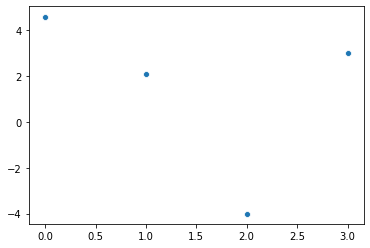

In [7]:
sns.scatterplot(x=my_series.index, y=my_series.values)

# Dataframes

The DataFrame represents tabular data, a bit like a spreadsheet. DataFrames are organised into colums (each of which is a Series), and each column can store a single data-type, such as floating point numbers, strings, boolean values etc. DataFrames can be indexed by either their row or column names. (They are similar in many ways to R’s data.frame. You worked with them?)

We can create a DataFrame in Pandas from a Python dictionary, by loading in a text file containing tabular data, from a table of a Database, from an excel spreadsheet, etc.

In [9]:
my_dataframe = pd.read_csv("myData", index_col=[0], header=[0], sep=" ")

In [10]:
print( my_dataframe )

      geneName  geneCount pathway
index                            
1            A          8      P1
2            B         12      P1
3            C         10      P1
4            D          3      P1
5            E          1      P1
6            F         25      P2
7            G          4      P2
8            H         13      P2
9            I         13      P1
10           J         38      P1
11           K         14      P3
12           L         19      P2
13           M         24      P1
14           N         22      P3
15           O          9      P3
16           P         33      P3
17           Q         29      P3
18           R         54      P3
19           S          2      P1
20           T         80      P2


In [12]:
# When we print it we are getting the string value of printing the dataframe
# by just letting an expression at the last line of a cell we can get, with pandas,
# prettier prints
my_dataframe

,geneName,geneCount,pathway
index,,,
1,A,8,P1
2,B,12,P1
3,C,10,P1
4,D,3,P1
5,E,1,P1
6,F,25,P2
7,G,4,P2
8,H,13,P2
9,I,13,P1


## Searching for data

As always with tabular data, we can access it through its rows or columns. In the case of rows we have two possibilities

1. Selecting data by row numbers (.iloc)
2. Selecting data by label or by a conditional statment (.loc)


In [13]:
print( "The row with index 8 is: " )
print( my_dataframe.loc[8] )
print( "" )
print( "Please notice that we have to use brakets, no parenthesis!!!")
print( "" )
print( "The type of the returned row is a ", type(my_dataframe.loc[8]) )
print( "" )
print( "If we want, for example, to get a list of the values, we have to convert it: ", list(my_dataframe.loc[8]) )
print( "(But we lose the label of each data, its index)" )


The row with index 8 is: 
geneName      H
geneCount    13
pathway      P2
Name: 8, dtype: object

Please notice that we have to use brakets, no parenthesis!!!

The type of the returned row is a  <class 'pandas.core.series.Series'>

If we want, for example, to get a list of the values, we have to convert it:  ['H', 13, 'P2']
(But we lose the label of each data, its index)


Packages like panda allows for the conditional selection and filtering of the data (thing that we will do it a lot).

In [14]:
print( "My filtered loc gives as a result: " )
print( my_dataframe.loc[my_dataframe.index < 8] )
print( "My filtered loc gives as a result: " )
print( "And its type is now a ", type (my_dataframe.loc[my_dataframe.index < 8]) )


My filtered loc gives as a result: 
      geneName  geneCount pathway
index                            
1            A          8      P1
2            B         12      P1
3            C         10      P1
4            D          3      P1
5            E          1      P1
6            F         25      P2
7            G          4      P2
My filtered loc gives as a result: 
And its type is now a  <class 'pandas.core.frame.DataFrame'>


To access data by column we have to use double brackets

In [15]:
print( my_dataframe[["geneCount"]])
print( "Which is a ", type( my_dataframe[["geneCount"]] ))

       geneCount
index           
1              8
2             12
3             10
4              3
5              1
6             25
7              4
8             13
9             13
10            38
11            14
12            19
13            24
14            22
15             9
16            33
17            29
18            54
19             2
20            80
Which is a  <class 'pandas.core.frame.DataFrame'>


In [16]:
# We can select multiple columns
my_dataframe[["geneName", "geneCount"]]

,geneName,geneCount
index,,
1,A,8
2,B,12
3,C,10
4,D,3
5,E,1
6,F,25
7,G,4
8,H,13
9,I,13


In [18]:
# With iloc we have access to the dataframe as a matrix.
print( my_dataframe.iloc[0] ) # The whole row
print( my_dataframe.iloc[0,0] ) # A specific cell

geneName      A
geneCount     8
pathway      P1
Name: 1, dtype: object
A


In [32]:
# We can access AT certain index for a specific column
my_dataframe.at[4,"pathway"]

'P1'

### Composed search

In [23]:
my_dataframe.loc[my_dataframe["pathway"] == "P1"]

,geneName,geneCount,pathway
index,,,
1,A,8,P1
2,B,12,P1
3,C,10,P1
4,D,3,P1
5,E,1,P1
9,I,13,P1
10,J,38,P1
13,M,24,P1
19,S,2,P1


In [34]:
# What is happenning is that I'm evaluating and returning the evaluation
(my_dataframe["pathway"] == "P1") & (my_dataframe["geneCount"] > 10)


index
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [35]:
# So, when we make a "loc", we filter the index by this criteria
my_dataframe.loc[(my_dataframe["pathway"] == "P1") & (my_dataframe["geneCount"] > 10)]


,geneName,geneCount,pathway
index,,,
2,B,12,P1
9,I,13,P1
10,J,38,P1
13,M,24,P1


## Seaborn and pandas integration

The good thing about Seaborn is that it have native Pandas integration. Plot data coming from Series and DataFrames is really simple.


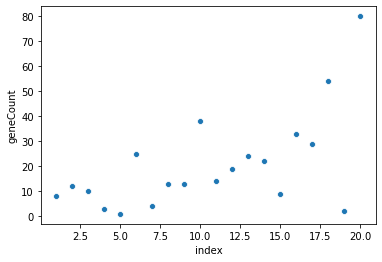

In [36]:
sns.scatterplot(my_dataframe.index, my_dataframe["geneCount"])

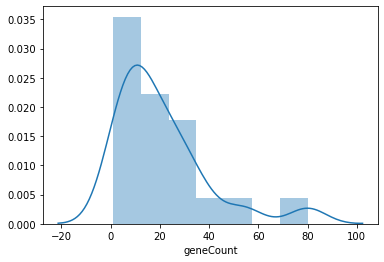

In [37]:
sns.distplot(my_dataframe["geneCount"])

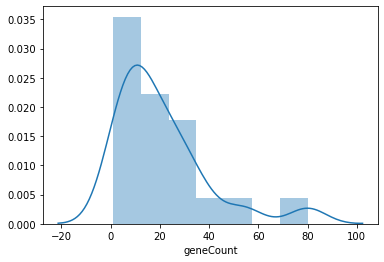

In [38]:
# We can access the columns as well as "attributes" of the dataframe
sns.distplot(my_dataframe.geneCount)

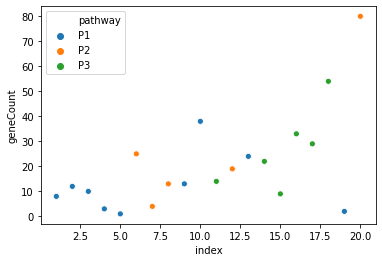

In [39]:
sns.scatterplot(my_dataframe.index, my_dataframe.geneCount, hue=my_dataframe.pathway)

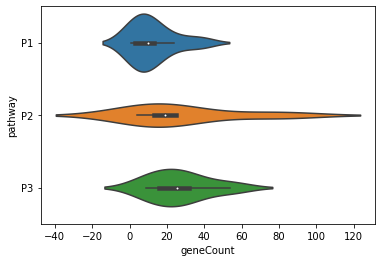

In [41]:
sns.violinplot(my_dataframe.geneCount, my_dataframe.pathway)

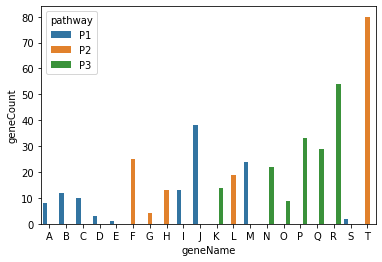

In [47]:
sns.barplot(my_dataframe.geneName,my_dataframe.geneCount, hue=my_dataframe.pathway)